In [2]:
## In Class 2021-08-25

In [12]:
## Q1. Using the pandas library, read the csv data file and create a data-frame called house price.import boto3
import pandas as pd

## Defining the S3 bucket
s3 = boto3.resource('s3')
bucket_name = 'bonnieh-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

##R Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
## Q2 Drop the No column

house_price.drop(columns=['No'])

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


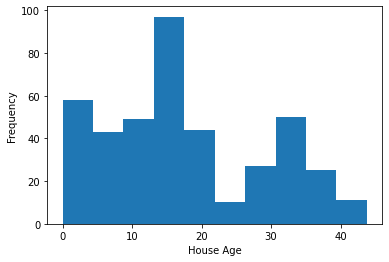

In [14]:
## Q3 Create a histogram of house age. Describe the plot.

import matplotlib.pyplot as plt

plt.hist(house_price['house_age'])
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()

## there are a lot of houses around 15 years of age, and is a bimodal right-skewed 
##distribution

Text(0, 0.5, 'Frequency')

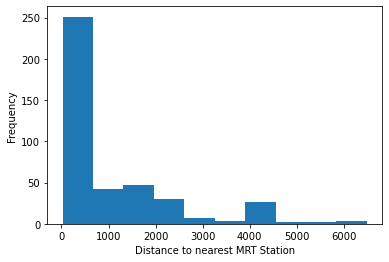

In [16]:
## Q4. Create a histogram of distance to nearest MRT station. Describe the plot

plt.hist(house_price['distance_to_the_nearest_MRT_station'])
plt.xlabel('Distance to nearest MRT Station')
plt.ylabel('Frequency')

## plot is right skewed with a peak around 500 (unknown units)

In [19]:
## Q5  Build a linear regression model in which: house age, distance to the nearest MRT
## station, number of convenience stores, latitude, and longitude are the input variables, and
## house price of unit area is the target variable.

## building a linear regression model

from sklearn.linear_model import LinearRegression

## Definig the input and target variables

X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores','latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

## Building the model
lm_md = LinearRegression().fit(X, Y)
lm_md.coef_

array([-2.68916833e-01, -4.25908898e-03,  1.16302048e+00,  2.37767191e+02,
       -7.80545273e+00])

In [ ]:
## Q6. Using the model from part 5, predict the house of unit area of a house with the following characteristics: 
## house age = 5, distance to the nearest MRT station = 500, number of convenience stores= 3, 
## latitude = 24.98, and longitude = 121.49.

## Can skip this question for now--this is review material